# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [19]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist, fashion_mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


First, create some useful functions

In [20]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `fashion_mnist` dataset and normalize in the range [0, 1]

In [21]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MNIST and show its architecture

In [22]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(10, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

Define some constants and train de CNN

In [23]:
batch_size = 128
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 14s 29ms/step - loss: 0.9175 - accuracy: 0.6727 - val_loss: 0.6681 - val_accuracy: 0.7608
Epoch 2/50
469/469 [==============================] - 13s 28ms/step - loss: 0.5943 - accuracy: 0.7882 - val_loss: 0.5482 - val_accuracy: 0.8078
Epoch 3/50
469/469 [==============================] - 13s 29ms/step - loss: 0.5028 - accuracy: 0.8210 - val_loss: 0.5241 - val_accuracy: 0.8128
Epoch 4/50
469/469 [==============================] - 13s 29ms/step - loss: 0.4500 - accuracy: 0.8425 - val_loss: 0.4757 - val_accuracy: 0.8260
Epoch 5/50
469/469 [==============================] - 13s 29ms/step - loss: 0.4158 - accuracy: 0.8526 - val_loss: 0.4453 - val_accuracy: 0.8448
Epoch 6/50
469/469 [==============================] - 13s 29ms/step - loss: 0.3924 - accuracy: 0.8609 - val_loss: 0.4088 - val_accuracy: 0.8510
Epoch 7/50
469/469 [==============================] - 14s 29ms/step - loss: 0.3718 - accuracy: 0.8679 - val_loss: 0.3861 - val_accuracy:

Show the performance of the model

Test score: 0.3031619191169739
Test accuracy: 0.8931999802589417


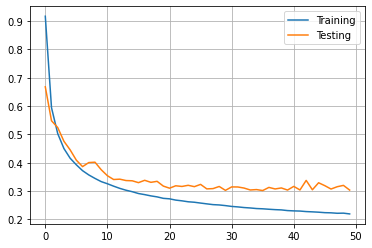

In [24]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [25]:
def compute_fscore(matrix, c):
    selector = [x for x in range(matrix.shape[1]) if x != c]
    tp = matrix[c,c]
    fp = np.sum(matrix[selector,c])
    fn = np.sum(matrix[c,selector])
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * precision * recall / (precision + recall)

def plot_confusion_matrix(conf_matrix, classes_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']):
    fig, ax = pl.subplots()
    im = ax.imshow(conf_matrix, cmap="viridis")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(classes_names)), labels=classes_names)
    ax.set_yticks(np.arange(len(classes_names)), labels=classes_names)

    # Rotate the tick labels and set their alignment.
    pl.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(classes_names)):
        for j in range(len(classes_names)):
            text = ax.text(j, i, conf_matrix[i, j], fontweight="normal", fontsize="small", ha="center", va="center", c="r")

    fig.tight_layout()
    pl.show()
    
    for i in range(len(classes_names)):
        print(f"F-score {i}: {compute_fscore(conf_matrix, i)}")

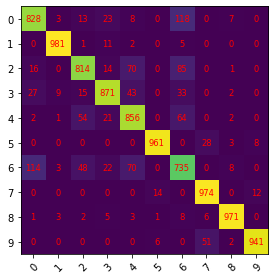

F-score 0: 0.8329979879275654
F-score 1: 0.9810000000000001
F-score 2: 0.8361581920903953
F-score 3: 0.8856126080325368
F-score 4: 0.8343079922027291
F-score 5: 0.9697275479313825
F-score 6: 0.7177734375
F-score 7: 0.946090335114133
F-score 8: 0.9729458917835672
F-score 9: 0.9597144314125446


In [26]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
conf_mat = me.confusion_matrix(y_test, pred)

plot_confusion_matrix(conf_mat)